# Objectives

- Discuss and define tidy versus untidy data formats
- Learn how to use pd.melt and pd.pivot to transform data (apply the concept of Tidy data on an example from this week's project)
- Discuss and define wide versus long data formats and their respective use cases

# Warm-up

**Research in groups of 3 the concept of Tidy Data**

1. What are the rules/characteristics of Tidy Data ?
2. What are examples of Untidy Data ?
3. Why should we want our data to be Tidy ?


Rules for Tidy Data:

1. Every column is a single measurement or variable or attribute
2. Every row is a single record or an observation 
3. Every observational unit is in a single table

## 1. Tidy versus Untidy Data

### **Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:**


- each variable is a column
- each observation is a row 
- and each type of observational unit is a table

Tidy data makes it easy for an analyst or a computer to extract needed variables because it
provides a standard way of structuring a dataset. It is also very pleasant to work with in the data exploration and plotting phases of a data project.

In [2]:
# example of a tidy dataset --> Pinguins dataset

import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Q: Why is this data Tidy ?

### **Untidy datasets can violate the Tidy data structure rules above in different ways. For example:**

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.


### Q: Which rule(s) of Tidy data do the following datasets violate ?

[source](https://krspiced.pythonanywhere.com/_downloads/7283af99091a60bed9036865164fe7c6/tidy_data_wickham.pdf)

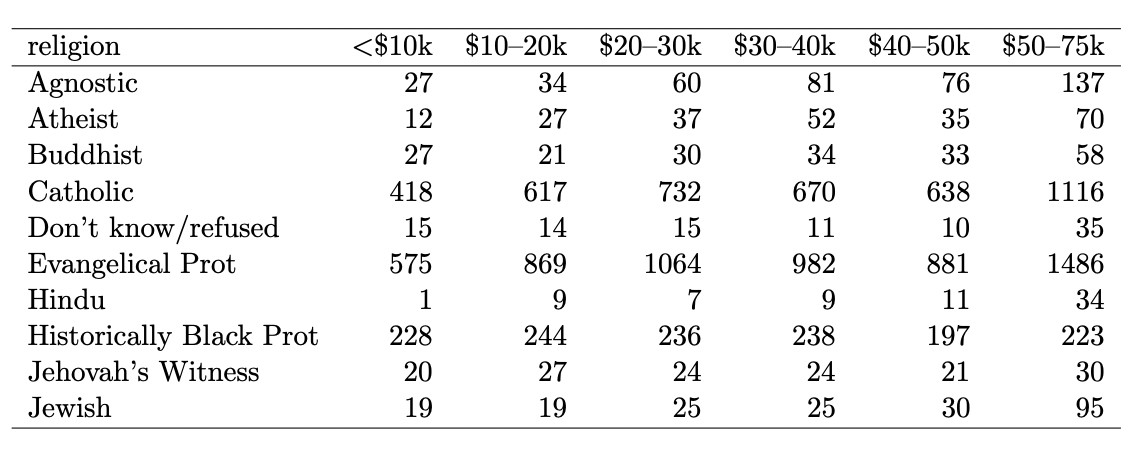

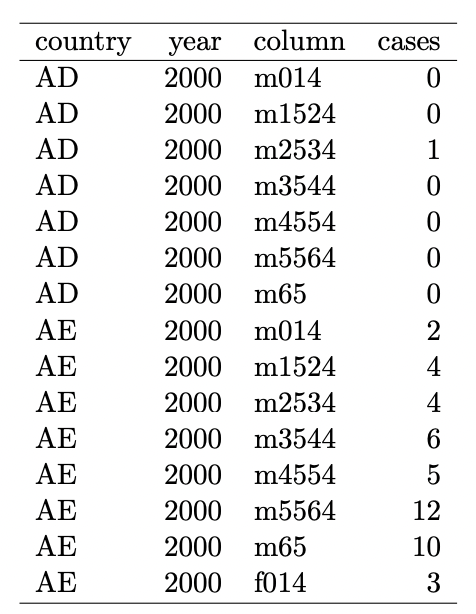

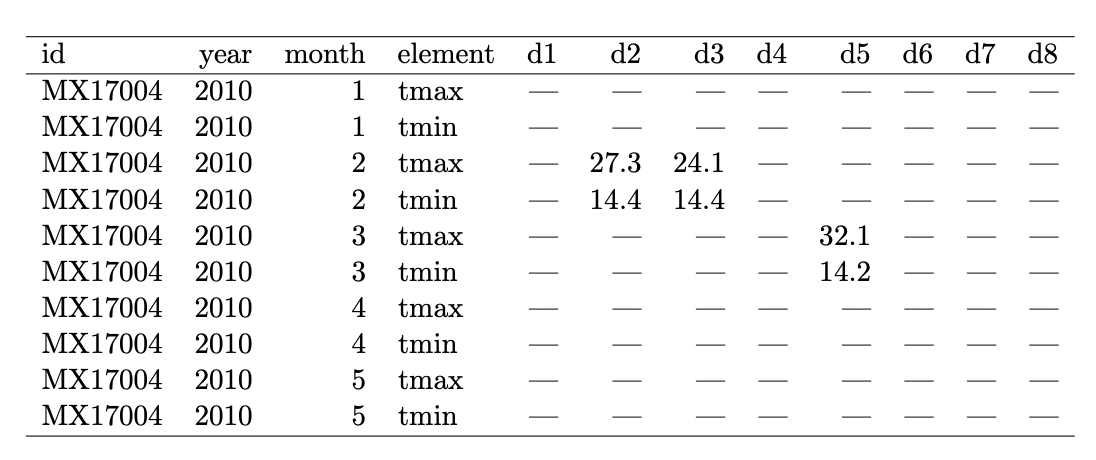

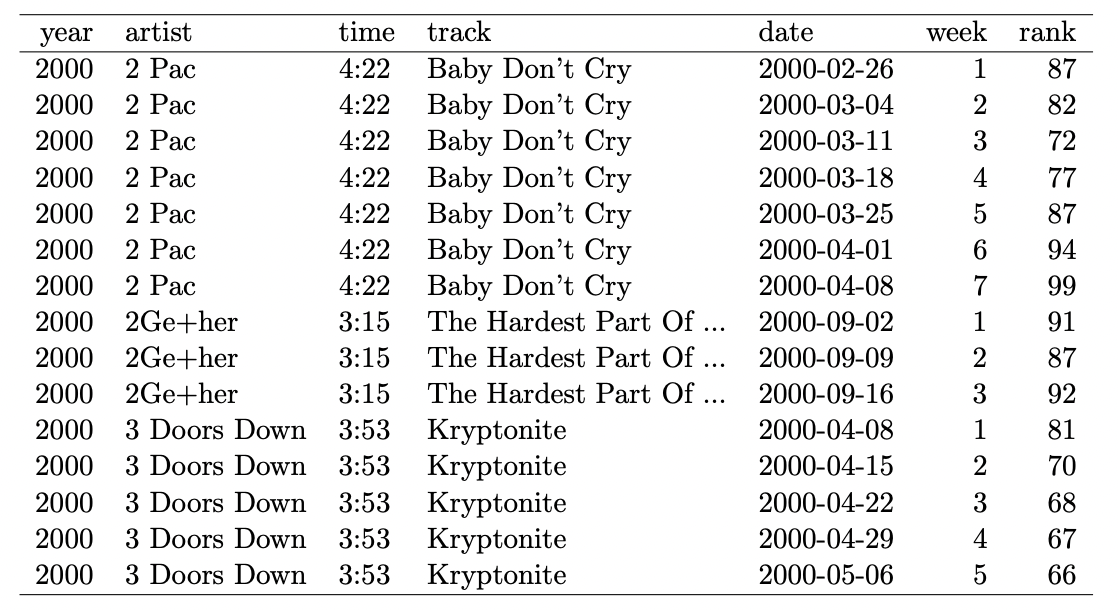

## 2. How to transform data using pd.melt and pd.pivot ?

**Let's look at the Life Expectancy dataset from this week**

In [4]:


life = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
life.dropna(inplace=True)
life.shape

(201, 217)

In [5]:
life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to South Sudan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 342.3+ KB


In [7]:
life.shape

(201, 217)

In [8]:
life.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,69.952139,70.264876,70.601194,70.800199,71.166269,71.514577,71.774776,71.950050,72.187861,72.428507
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,8.989729,8.836546,8.647311,8.946296,8.414504,8.255997,8.161011,8.116259,7.941638,7.776782
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.100000,48.860000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,64.400000,64.700000,65.000000,65.200000,65.300000,65.900000,66.200000,66.600000,66.800000,67.100000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,72.600000,72.900000,73.300000,73.600000,73.700000,74.000000,74.100000,74.300000,74.400000,74.500000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,76.900000,77.100000,77.300000,77.500000,77.400000,78.000000,78.000000,78.200000,78.500000,78.600000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,82.400000,82.500000,82.700000,82.840000,83.020000,83.200000,83.380000,83.560000,83.730000,83.900000


### Q:  does this dataset violate the Tidy data rules ?

- columns are not named correctly named
- columns are values

**We can tidy this dataset using a tool from pandas ==> pd.melt()**

In [9]:
## step 1: fix the index

life.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Vanuatu', 'Venezuela', 'West Bank and Gaza', 'Western Sahara',
       'Vietnam', 'Virgin Islands (U.S.)', 'Yemen', 'Zambia', 'Zimbabwe',
       'South Sudan'],
      dtype='object', name='Life expectancy', length=201)

In [10]:
life.reset_index(inplace=True)

life.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
3,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
4,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [11]:
life.tail()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
196,Virgin Islands (U.S.),33.40,33.40,33.40,33.40,33.40,33.40,33.40,33.40,33.40,...,78.86,79.05,79.25,79.46,79.69,79.92,80.15,80.38,80.6,80.82
197,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,65.20,65.70,66.20,66.60,66.60,66.70,67.10,67.10,66.0,64.92
198,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.00,51.10,52.30,53.10,53.70,54.70,55.60,56.30,56.7,57.10
199,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.40,47.30,48.00,49.10,51.60,54.20,55.70,57.00,59.3,61.69
200,South Sudan,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,...,55.50,55.60,55.80,56.00,55.90,56.00,56.00,56.10,56.1,56.10


In [ ]:
life.info()

In [ ]:
life.shape

In [12]:
## step 2: change the name of the countries column

## hint: Use Shift + Tab in jupyter to see the complete list of a method's arguments

life.rename(columns={'Life expectancy': 'country'}, inplace=True)

life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
3,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
4,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [13]:
# step 3: use pd.melt to shape the dataframe to a tidy/long format

tidy_life = pd.melt(life,                        # <==== untidy/wide dataframe
                    id_vars='country',           # <==== columns from the untidy/wide dataframe we want unchanged
                    var_name='year'  ,           # <==== new column name for the variable column
                    value_name='life_expectancy' # <==== new column name for the value column
                   )

tidy_life.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54


In [14]:
tidy_life.shape

(43617, 3)

In [15]:
201*217

43617

In [18]:
tidy_life.loc[tidy_life['country']=='Afghanistan']

,country,year,life_expectancy
0,Afghanistan,1800,28.21
201,Afghanistan,1801,28.20
402,Afghanistan,1802,28.19
603,Afghanistan,1803,28.18
804,Afghanistan,1804,28.17
...,...,...,...
42612,Afghanistan,2012,54.40
42813,Afghanistan,2013,54.80
43014,Afghanistan,2014,54.90
43215,Afghanistan,2015,53.80


In [35]:
tidy_life.iloc[0:10]

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54
5,Argentina,1800,33.20
6,Armenia,1800,34.00
7,Aruba,1800,34.42
8,Australia,1800,34.05
9,Austria,1800,34.40


In [30]:
tidy_life.loc[tidy_life['life_expectancy']>50.0]

,country,year,life_expectancy
9179,Norway,1845,50.07
10988,Norway,1854,51.65
11189,Norway,1855,50.44
11390,Norway,1856,50.37
11591,Norway,1857,50.22
...,...,...,...
43612,Virgin Islands (U.S.),2016,80.82
43613,Yemen,2016,64.92
43614,Zambia,2016,57.10
43615,Zimbabwe,2016,61.69


In [29]:
tidy_life['life_expectancy']>50.0

0        False
1        False
2        False
3        False
4        False
         ...  
43612     True
43613     True
43614     True
43615     True
43616     True
Name: life_expectancy, Length: 43617, dtype: bool

In [27]:
type(tidy_life[['country']])

pandas.core.frame.DataFrame

In [20]:
example = tidy_life.set_index('country')

example.loc['Afghanistan']

,year,life_expectancy
country,,
Afghanistan,1800,28.21
Afghanistan,1801,28.20
Afghanistan,1802,28.19
Afghanistan,1803,28.18
Afghanistan,1804,28.17
...,...,...
Afghanistan,2012,54.40
Afghanistan,2013,54.80
Afghanistan,2014,54.90


In [21]:
example2 = tidy_life.set_index('year')
example2.loc['2016']

,country,life_expectancy
year,,
2016,Afghanistan,52.72
2016,Albania,78.10
2016,Algeria,76.50
2016,Angola,60.00
2016,Antigua and Barbuda,76.50
...,...,...
2016,Virgin Islands (U.S.),80.82
2016,Yemen,64.92
2016,Zambia,57.10


country            Armenia
life_expectancy       34.0
Name: 1810, dtype: object

### Q: How do we go back from the tidy/long format that we have now to the untidy/wide format we had before ?

In [37]:
wide_life = pd.pivot(tidy_life,                 # <===  tidy/long format df
         columns='year',            # <=== column(s) whose values we want as our new columns
         index='country',           # <=== column to use as our new index
         values='life_expectancy')  # <=== column whose values we want to populate our new wide dataframe

In [38]:
wide_life.head()

year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [42]:
wide_life.reset_index()

year,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.40,52.80,53.30,53.60,54.00,54.40,54.80,54.90,53.8,52.72
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.60,76.80,77.00,77.20,77.40,77.50,77.70,77.90,78.0,78.10
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.30,75.50,75.70,76.00,76.10,76.20,76.30,76.30,76.4,76.50
3,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.20,56.70,57.10,57.60,58.10,58.50,58.80,59.20,59.6,60.00
4,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.30,75.50,75.70,75.80,75.90,76.10,76.20,76.30,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,32.10,32.10,32.10,32.10,32.10,32.10,32.10,32.10,32.10,...,74.30,74.10,73.80,74.30,74.20,74.20,74.40,74.50,74.6,74.70
197,Western Sahara,34.75,34.75,34.75,34.75,34.75,34.75,34.75,34.75,34.75,...,65.79,66.16,66.51,66.84,67.17,67.47,67.76,68.04,68.3,68.56
198,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,65.20,65.70,66.20,66.60,66.60,66.70,67.10,67.10,66.0,64.92
199,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.00,51.10,52.30,53.10,53.70,54.70,55.60,56.30,56.7,57.10


In [43]:
wide_life.iloc[0]

year
1800    28.21
1801    28.20
1802    28.19
1803    28.18
1804    28.17
        ...  
2012    54.40
2013    54.80
2014    54.90
2015    53.80
2016    52.72
Name: Afghanistan, Length: 217, dtype: float64

In [45]:
wide_life.head()

year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [47]:
wide_life.loc['Afghanistan']

year
1800    28.21
1801    28.20
1802    28.19
1803    28.18
1804    28.17
        ...  
2012    54.40
2013    54.80
2014    54.90
2015    53.80
2016    52.72
Name: Afghanistan, Length: 217, dtype: float64

## 3. Wide versus Long Data Format

Data in pandas and tabular data in general can exist in two forms: **long** and **wide** format.

- In the long format, for each type of variable, there is a single value column and another column that contains the variable name for each of the values. This format is great for plotting with seaborn.

- In the wide format, each variable has its own column. This format is great for calculating descriptive statistics or for applying machine learning with sklearn.

The conversion between long and wide format helps you to bring data into the right format for merging, concatenation or plotting.

Before applying the transformations, make sure that your data is **Tidy Data**. Once your data is tidy, transformations from one format to the other will become simple.



### Let's look at an example with the penguins dataset

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


 we can melt bill measurements and have a single culmen column, this will give us a **long** format dataframe

In [49]:
# before we do that, it would be helpful to have an additional penguin id column

penguins['id'] = penguins.index

In [50]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4


In [51]:
penguins_long = penguins.melt(id_vars=['id', 'sex', 'species', 'island'],  
                              value_vars=['bill_length_mm', 'bill_depth_mm'], 
                              var_name='bill',  
                              value_name='mm') 

In [52]:
penguins_long.head()

,id,sex,species,island,bill,mm
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
3,3,NaN,Adelie,Torgersen,bill_length_mm,NaN
4,4,Female,Adelie,Torgersen,bill_length_mm,36.7


In [53]:
penguins_long.sort_values('id').reset_index(drop=True)

,id,sex,species,island,bill,mm
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,0,Male,Adelie,Torgersen,bill_depth_mm,18.7
2,1,Female,Adelie,Torgersen,bill_depth_mm,17.4
3,1,Female,Adelie,Torgersen,bill_length_mm,39.5
4,2,Female,Adelie,Torgersen,bill_length_mm,40.3
...,...,...,...,...,...,...
683,341,Male,Gentoo,Biscoe,bill_length_mm,50.4
684,342,Female,Gentoo,Biscoe,bill_depth_mm,14.8
685,342,Female,Gentoo,Biscoe,bill_length_mm,45.2
686,343,Male,Gentoo,Biscoe,bill_length_mm,49.9


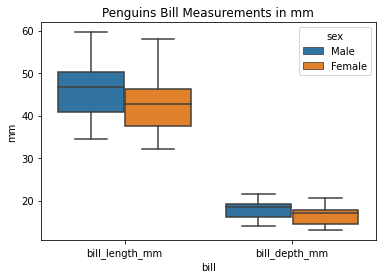

In [54]:
# this format is useful because now we can analyze it as if it were a single variable


ax = sns.boxplot(hue='sex', y='mm', x='bill', data=penguins_long);
ax.set_title('Penguins Bill Measurements in mm');